<a href="https://colab.research.google.com/github/SukumarmalliReddy/ML_LABs/blob/main/ML_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Load the dataset
file_path = '/content/Lab3.csv'
df = pd.read_csv(file_path)

# Preview the data
print("Dataset:")
print(df.head())


Dataset:
    Outlook Temperature Humidity    Wind Play Tennis
0     Sunny         Hot     High    Weak          No
1     Sunny         Hot     High  Strong          No
2  Overcast         Hot     High    Weak         Yes
3      Rain        Mild     High    Weak         Yes
4      Rain        Cool   Normal    Weak         Yes


Accuracy of the model: 60.00%


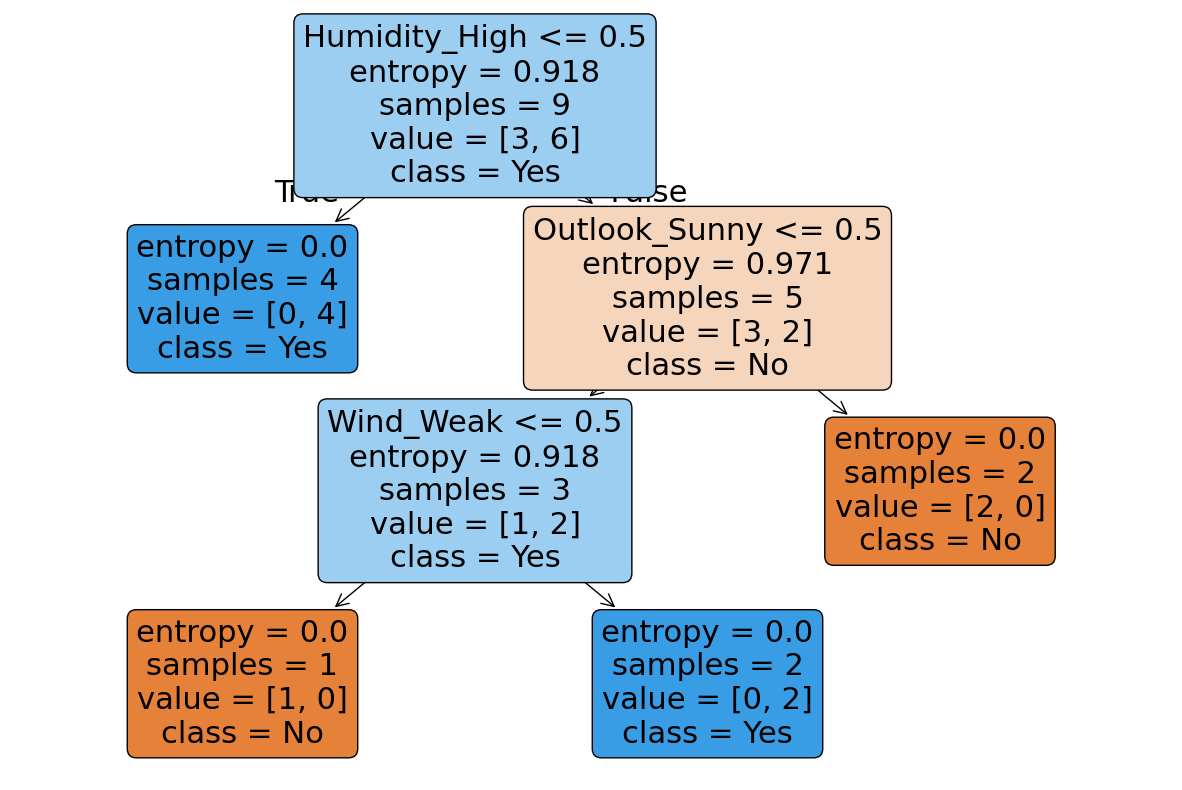

Predicted class for the new sample: No


In [2]:
# Prepare the data for training
# Assume that the target column is the last column ('PlayTennis') and the rest are features
X = df.iloc[:, :-1]  # All columns except the last one as features
y = df.iloc[:, -1]   # The last column as the target

# Convert categorical features into numerical values using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the Decision Tree classifier using ID3 algorithm (entropy)
clf = DecisionTreeClassifier(criterion='entropy')

# Train the model
clf.fit(X_train, y_train)

# Test the model's accuracy on the test data
accuracy = clf.score(X_test, y_test)
print(f"Accuracy of the model: {accuracy * 100:.2f}%")

# Visualize the decision tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_, rounded=True)
plt.show()

# Classify a new sample
# Example: {'Outlook': 'Sunny', 'Temperature': 'Hot', 'Humidity': 'High', 'Wind': 'Weak'}
new_sample = pd.DataFrame({
    'Outlook': ['Sunny'],
    'Temperature': ['Hot'],
    'Humidity': ['High'],
    'Wind': ['Weak']
})

# Convert the new sample into the same format (one-hot encoding)
new_sample_encoded = pd.get_dummies(new_sample)
new_sample_encoded = new_sample_encoded.reindex(columns=X.columns, fill_value=0)

# Predict the class of the new sample
predicted_class = clf.predict(new_sample_encoded)
print(f"Predicted class for the new sample: {predicted_class[0]}")
